<a href="https://colab.research.google.com/github/MariaDAH/durham-AI-foundations-course/blob/main/california_housing_dataset_maria_herrero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Section 1: Import Libaries ↓**

This code imports five essential libraries for machine learning in Python: pandas for handling and analyzing data, scikit-learn tools for splitting datasets and building a linear regression model, gspread to read and open Google sheets, maptplot is the core Python library for plotting graphs and seaborn that is built on top of matplotlib and makes charts prettier and easier. In short, it sets up the environment to prepare data, split it into training/testing sets, and train a linear regression algorithm.



In [ ]:

import pandas as pd
import gspread
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


**Section 2: Load Sample Data ↓**

This code loads the California housing dataset from scikit-learn as a pandas DataFrame using fetch_california_housing(as_frame=True). It then stores the data in df and displays the first few rows with df.head().

In [ ]:

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head(10)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


**Open ML sheets from URL, display adjustment sheet first rows** This code opens the dataset in a previous created Interractive Google Sheet. Manually, it has been also added another sheet explaining the adjudments done to the dataset while investigating how to reduce the MSE for more accurate predictions.
Clicking in URL, the ML Sheet will be open in the browser.

In [ ]:
from google.colab import sheets
from google.colab import auth

auth.authenticate_user()

from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)

# Open spreadsheet by ID or URL
sheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/16qQ4Lk8tzk9v6cSHrgWizTGInxk1tLT_rydj7EPxciM/edit?gid=0#gid=0")

# Read a specific worksheet by name
worksheet = sheet.worksheet("adjustments")

data = worksheet.get_all_records()
adjust_frame = pd.DataFrame(data)

adjust_frame.head()

,Adjustment,Model adjustment,MSE,RMSE (square root of MSE),RSE in $,"If your Mean Squared Error (MSE) rounds to 0.7007. MSE represents the average squared difference between predicted and actual values. Since the target variable (MedHouseVal) is in units of $100,000, an MSE of 0.7007 means the average squared error is about 0.7007 × (100,000)^2. To interpret more intuitively, take the square root to get Root Mean Squared Error (RMSE): 0.7007≈0.836\sqrt{0.7007} \approx 0.8360.7007​≈0.836 This means the model’s predictions are off by about $83,600 on average."
0,No adjustment all features MedHouseVal \nis th...,"X = df[['MedInc','HouseAge','AveRooms','AveBed...",0.524321,0.7241,"$72,410.01",
1,Split dataset to get a training set of 20% - t...,"X_train, X_test, y_train, y_test = train_test_...",,,,
2,Heat map to find higly correlated values,"corr_matrix = X_train.corr(method=""pearson"") ...",,,,"Found 'AveRooms','AveBedrms are highly correla..."
3,Recalculate removing highly correlated \nfeatures,"X = df[['MedInc','HouseAge','AveRooms','Popula...",0.655721,0.809766,"$80,976.59",
4,Change training/testing split to 30% - 70%,"X_train, X_test, y_train, y_test = train_test_...",0.637256,0.798283,"$79,828.34",


**Section 3: Understand model with no adjudments and all features using linear regression model to calculate target MedHouseVal**. Because the dataset is not to big, first I trained the model and calculated the MSE with no adjudments, to understand the model with the existing data.

In [ ]:
X = df[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude',	'Longitude']]  # Features
y = df['MedHouseVal']  # Target
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X)
print("MSE:", mean_squared_error(y, y_pred))

MSE: 0.5243209861846072


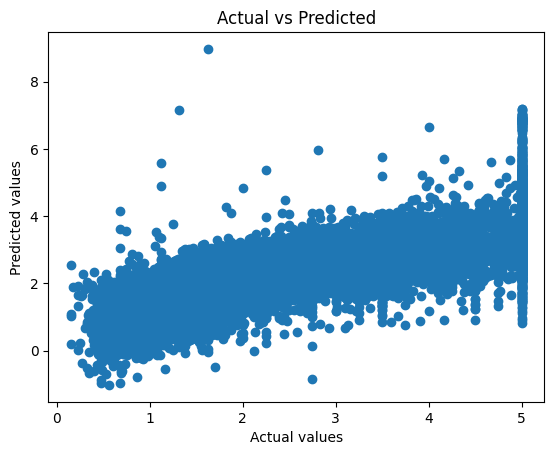

In [ ]:
plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted")
plt.show()

**Section 4: Split the data** The purpose of spliting the data is model to make sure the model can generalize to new, unseen data — not just memorize what it saw during training. Get 20% of the original dataset to get a first training set, use the rest of the datafrane, 80% training set.

In [ ]:
X = df[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']]  # Features
y = df['MedHouseVal']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
 random_state=42)

**Section 5: Draw heat map** Find highly correlated feature pairs to detect redundancy and instability in models that assume features are independent. Avoid overfitting by removing redundant features.

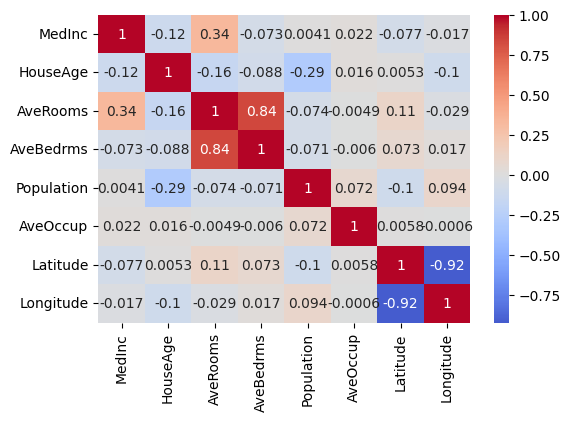

In [ ]:
corr_matrix = X_train.corr(method="pearson")   # linear (default)
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.show()

**Section 6: Remove from dataset highly correlated features.** Recalculate and retrain model.

In [ ]:
X = df[['MedInc','HouseAge','AveRooms','Population','AveOccup','Longitude']]  # Features
y = df['MedHouseVal']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
 random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Section 7: Make predictions ↓**

This code uses the trained model to predict target values for the test dataset (X_test). It then prints the first five predicted values to give a quick look at the model’s output.


In [ ]:
# Filter X_test to match the features used during the most recent model fit
features = ['MedInc','HouseAge','AveRooms','Population','AveOccup','Longitude']
predictions = model.predict(X_test[features])
print("First 5 predictions:", predictions[:5])

First 5 predictions: [1.05275367 1.51066771 2.37761571 2.67262117 2.11322305]


**Section 8: Checking the mean squared error ↓**

This code imports the mean_squared_error function from scikit-learn and calculates the MSE between the actual test values (y_test) and the model’s predictions, then prints the result to evaluate prediction accuracy.





In [ ]:

from sklearn.metrics import mean_squared_error
print("MSE:", mean_squared_error(y_test, predictions))


MSE: 0.6557208705028291


**Section 9: Explanation of the results**

The California Housing dataset predicts median house value in units of hundreds of thousands of dollars (i.e., \$100,000 increments). So:

If your Mean Squared Error (MSE) rounds to 0.6557.
MSE represents the average squared difference between predicted and actual values.
Since the target variable (MedHouseVal) is in units of $100,000, an MSE of 0.6577 means the average squared error is about 0.6577 × (100,000)^2.
To interpret more intuitively, take the square root to get Root Mean Squared Error (RMSE):
0.6577≈0.836\sqrt{0.6577} \approx 0.809585692​≈0.8095
This means the model’s predictions are off by about \$80,956 on average.

In the case of no adjudments made to the model the prediction is by about \$72,410 on average, with an MSE of 0.52432.

 Context: For California housing prices, which range from \$14,999 to \$500,000 in this dataset. This means, adjudments are not really predicting better that real data, even if the error is lower. Looks like minimizing the error is not making the model more accurate. We might need to spot abnormal values or outliers, and see how are affecting in the generalisation.

 Also, looking at the scatter plots may help to understand

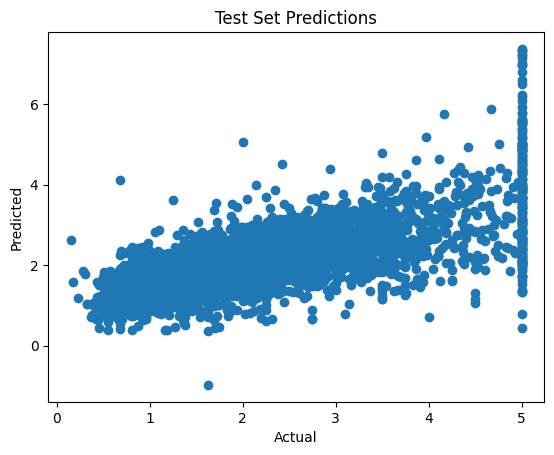

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Test Set Predictions")
plt.show()


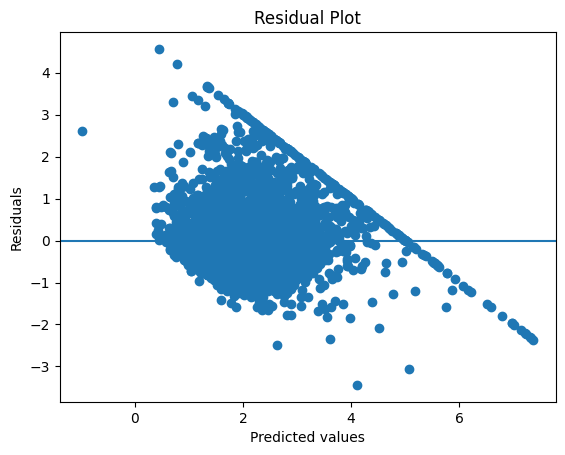

In [ ]:
residuals = y_test - predictions

plt.figure()
plt.scatter(predictions, residuals)
plt.axhline(0)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Interpreting the image above: As predicted values increase, residuals become strongly negative. For large predictions → model consistently overestimates.For small predictions → model underestimates. Looks like the model needs more data and this is a case of underfitting.

**Section 10: Try with different test sizes**.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
 random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

# Filter X_test to match the features used during the most recent model fit
features = ['MedInc','HouseAge','AveRooms','Population','AveOccup','Longitude']
y_pred = model.predict(X_test[features])
print("First 5 predictions:", predictions[:5])
print("MSE test:", mean_squared_error(y_test, y_pred))

First 5 predictions: [1.05275367 1.51066771 2.37761571 2.67262117 2.11322305]
MSE test: 0.6524826504103187


**Section 11: Compare with train SME** If both MSE are similar, and coeficients are stable, indicates correlation is not the problem.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)


MSE: 0.6524826504103187
R²: 0.5126016500305103


**Section 12: Use Ridges** Trying if we can improve the prediction via other techniques.
It adds a constraint that shrinks coefficients toward zero.
👉 Goal: reduce overfitting and stabilize the model.
Keep all features
But make their influence smaller

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

X = df[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']]  # Features
y = df['MedHouseVal']  # Target
model = LinearRegression()
model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
 random_state=42)

ridge = Ridge()

param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(
    ridge,
    param_grid,
    scoring="neg_mean_squared_error",
    cv=5
)

ridge_cv.fit(X_train, y_train)

best_ridge = ridge_cv.best_estimator_

train_mse_ridge = mean_squared_error(
    y_train, best_ridge.predict(X_train)
)
test_mse_ridge = mean_squared_error(
    y_test, best_ridge.predict(X_test)
)

r2 = r2_score(y_test, best_ridge.predict(X_test))

print("\nRidge Regression")
print("Best alpha:", ridge_cv.best_params_["alpha"])
print("Train MSE:", train_mse_ridge)
print("Test  MSE:", test_mse_ridge)
print("R²:", r2)



Ridge Regression
Best alpha: 10
Train MSE: 0.5179417369316771
Test  MSE: 0.5550405537343011
R²: 0.5764371559180015


**Uses Elastic Net (Ridge + Lasso combo)**
Lasso: It can shrink some coefficients exactly to zero.
👉 This automatically performs feature selection.
Ridge + Lasso = Shrink coefficients (Ridge) + Remove weak features (Lasso)



In [ ]:
from sklearn.linear_model import ElasticNet

X = df[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']]  # Features
y = df['MedHouseVal']  # Target
model = LinearRegression()
model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
 random_state=42)

enet = ElasticNet(max_iter=10000)

param_grid = {
    "alpha": [0.01, 0.1, 1, 10],
    "l1_ratio": [0.2, 0.5, 0.8]  # 0 = Ridge, 1 = Lasso
}

enet_cv = GridSearchCV(
    enet,
    param_grid,
    scoring="neg_mean_squared_error",
    cv=5
)

enet_cv.fit(X_train, y_train)

best_enet = enet_cv.best_estimator_

train_mse_enet = mean_squared_error(
    y_train, best_enet.predict(X_train)
)
test_mse_enet = mean_squared_error(
    y_test, best_enet.predict(X_test)
)

r2 = r2_score(y_test, best_enet.predict(X_test))

print("\nElastic Net")
print("Best params:", enet_cv.best_params_)
print("Train MSE:", train_mse_enet)
print("Test  MSE:", test_mse_enet)
print("R²:", r2)



Elastic Net
Best params: {'alpha': 0.01, 'l1_ratio': 0.2}
Train MSE: 0.5197890990692644
Test  MSE: 0.5467199202266105
R²: 0.5827868022084751


**Section 12: Explanation of the results**

The California Housing dataset predicts median house value in units of hundreds of thousands of dollars (i.e., \$100,000 increments). So:

If your Mean Squared Error (MSE) rounds to 0.5467.
MSE represents the average squared difference between predicted and actual values.
Since the target variable (MedHouseVal) is in units of $100,000, an MSE of 0.5467 means the average squared error is about 0.5467 × (100,000)^2.
To interpret more intuitively, take the square root to get Root Mean Squared Error (RMSE):
0.5467≈0.7394\sqrt{0.5467} \approx 0.7394​≈0.7394
This means the model’s predictions are off by about \$73,940 on average.

 Context: For California housing prices, which range from \$14,999 to \$500,000 in this dataset, an error of \$73,940 is moderate—not perfect, but reasonable for a simple linear regression model using only six features.

 Other option is trying with a non linear model, like Random forest or Decision Trees.